In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
churn_df = churn_data.copy()
churn_df.head()

# Удаляем первый столбец 'RowNumber' т.к. в нем содержится только лишняя информация
churn_df = churn_df.drop('RowNumber', axis=1)

#Переводим столбецы в тип данных категория
churn_df['Geography'] = churn_df['Geography'].astype('category')
churn_df['Gender'] = churn_df['Gender'].astype('category')
churn_df['HasCrCard'] = churn_df['HasCrCard'].astype('category')
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].astype('category')

# вместо 0, 1 в столбце лояльности клиентов записываем loyal и exited для информативности гарфиков
loyal_table = churn_df['Exited'].apply(lambda x: 'loyal' if x == 0 else 'exited')
activ_klients = churn_df['IsActiveMember'].apply(lambda x: 'Activ' if x == 1 else 'NotActiv')

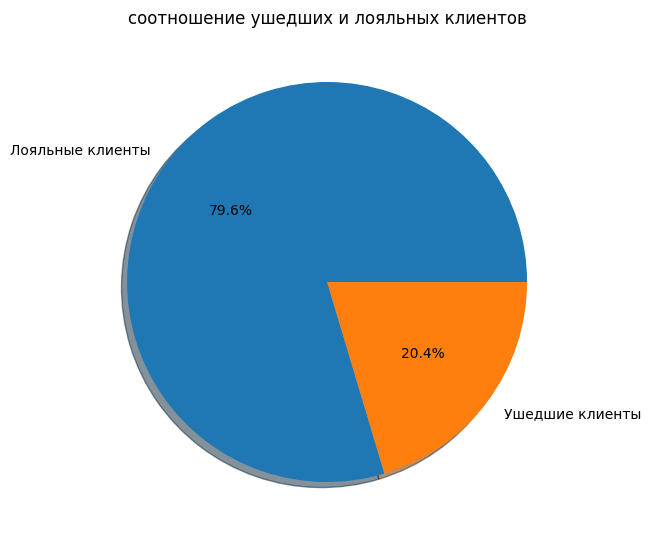

In [25]:
# считаем кол-во ляльных и ушедших клиентов
clients = churn_df['Exited'].value_counts()

# Создаем круговую диаграмму показывающуюу соотношение ушедших и лояльных клиентов
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
ax.pie(
    clients,
    shadow=True,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%'
)
ax.set_title('соотношение ушедших и лояльных клиентов');

На графике 'соотношение ушедших и лояльных клиентов' видно что лояльных клиентов в банке почти 80%

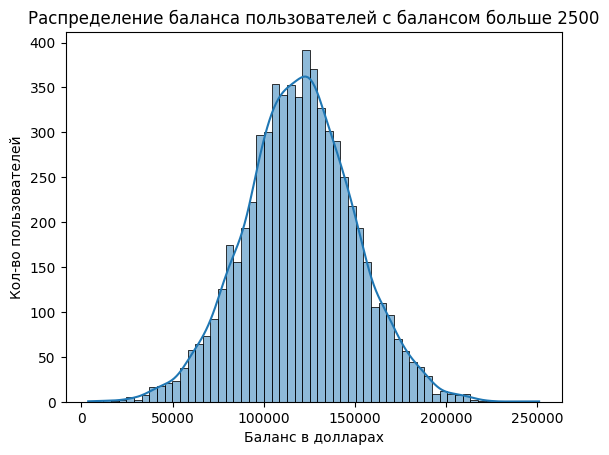

In [26]:
# Выбираем клиентов с балансом более 2500$
Balance_Big = churn_df['Balance'] > 2500

# Создаем гистограмму
histplot = sns.histplot(
    data=churn_df,
    x=churn_df['Balance'][Balance_Big],
    kde=True
)
histplot.set_title('Распределение баланса пользователей с балансом больше 2500')
histplot.set_xlabel('Баланс в долларах')
histplot.set_ylabel('Кол-во пользователей');

В графике 'Распределение баланса пользователей с болансом больше 2500' наблюдается плавный рост пользователей до примерно 125000 долларов и является максимальной отметкой количества пользователей, низкое количество пользователей наблюдается до 25тыс долларов и от 225тыс долларов

C:\Users\huk80\AppData\Local\Temp\ipykernel_1096\3166827254.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



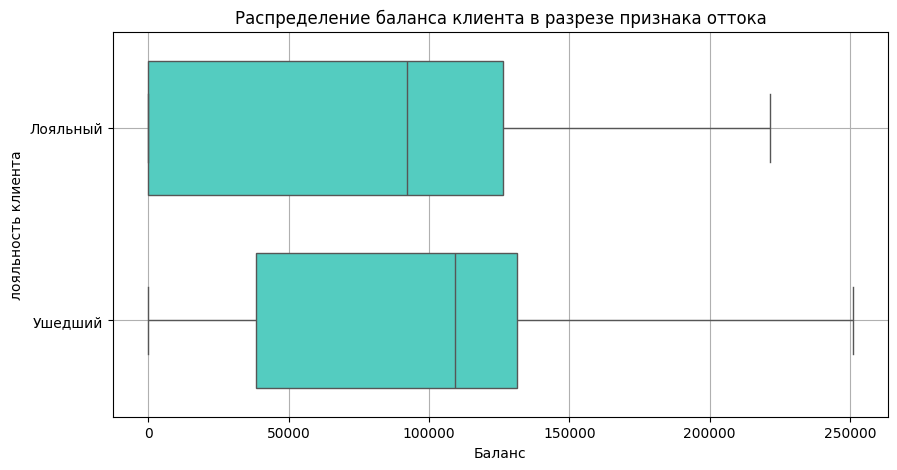

In [27]:
# создаем коробчатую диаграмму
fig = plt.figure(figsize=(10,5))
box_ottok=sns.boxplot(
    x=churn_df['Balance'],
    y=churn_df['Exited'],
    orient='h',
    width=0.7,
    color='turquoise'
);
box_ottok.set_title('Распределение баланса клиента в разрезе признака оттока')
box_ottok.set_xlabel('Баланс')
box_ottok.set_ylabel('лояльность клиента')
box_ottok.set_yticklabels(['Лояльный', 'Ушедший'])
box_ottok.grid();

у лояльных клиентов 1-ый квартиль сливается со 2-ым, т.е. примерно четверть лояльных клиентов имеет 0-ой баланс.
Наименьший разброс на графике у ушедших клиентов в 3-ем квартиле, он состовляет промежуток от 110тыс до 130тыс долларов, вероятно клиентам в этом диапазоне не нравятся устовия банка с таким балансом.

C:\Users\huk80\AppData\Local\Temp\ipykernel_1096\3983995716.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



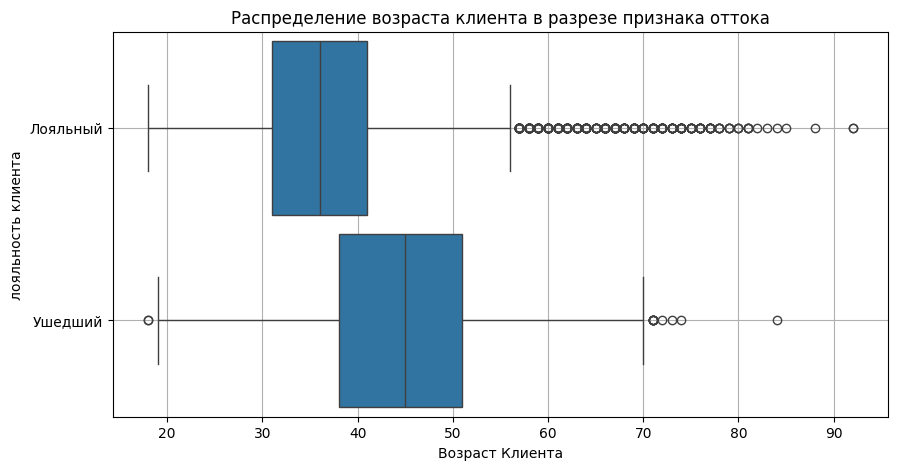

In [28]:
# Создаем коробчатую диаграмму
fig = plt.figure(figsize=(10,5))
box_ottok=sns.boxplot(
    x=churn_df['Age'],
    y=churn_df['Exited'],
    orient='h',
    width=0.9
);
box_ottok.set_title('Распределение возраста клиента в разрезе признака оттока')
box_ottok.set_xlabel('Возраст Клиента')
box_ottok.set_ylabel('лояльность клиента')
box_ottok.set_yticklabels(['Лояльный', 'Ушедший'])
box_ottok.grid();

У лояльных клиентов больше выбросов чем у ушедших, из этого следует что очень мало лояльных людей возраста от 55 до 92 лет.
Разброс возраста ушедших клиентов больше чем у лояльных, от 19 до 70 лет, стоит обратить внимание на клиентов  от 38 до 51 года т.к. это примерно потовина всех ушедших клиентов.

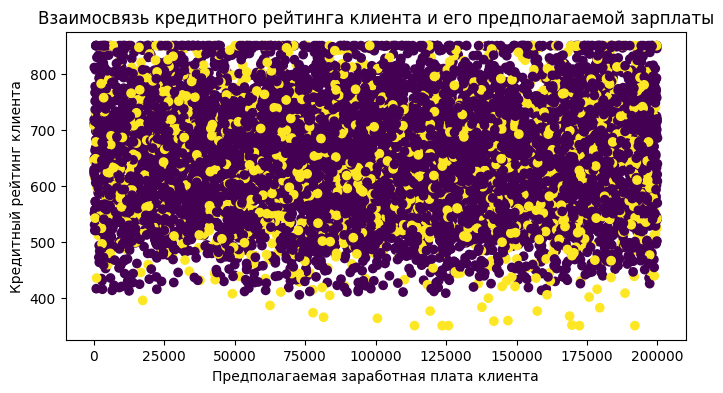

In [29]:
# Создаем диаграмму рассеяния
fig = plt.figure(figsize=(8, 4))
plt.scatter(
    data=churn_df,
    x='EstimatedSalary',
    y='CreditScore',
    c='Exited'
)
plt.title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.xlabel('Предполагаемая заработная плата клиента')
plt.ylabel('Кредитный рейтинг клиента');

График нечитаемый, найти взаимосвязь в нем невозможно

C:\Users\huk80\AppData\Local\Temp\ipykernel_1096\263433805.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



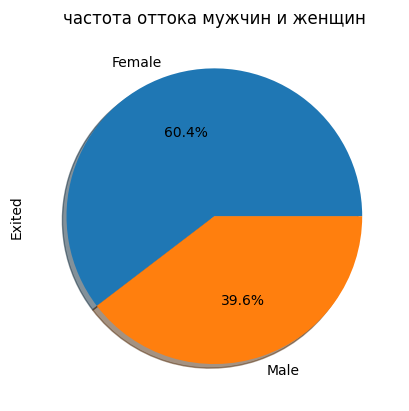

In [30]:
# Созздаем круговую диаграмму
gender = churn_df.groupby('Gender')['Exited'].mean()
gender.plot.pie(
    title='частота оттока мужчин и женщин',
    shadow=True,
    autopct='%.1f%%'
);

Женщины уходят чаще чем мужчины

C:\Users\huk80\AppData\Local\Temp\ipykernel_1096\1078993444.py:4: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:violet'` for the same effect.


C:\Users\huk80\AppData\Local\Temp\ipykernel_1096\1078993444.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



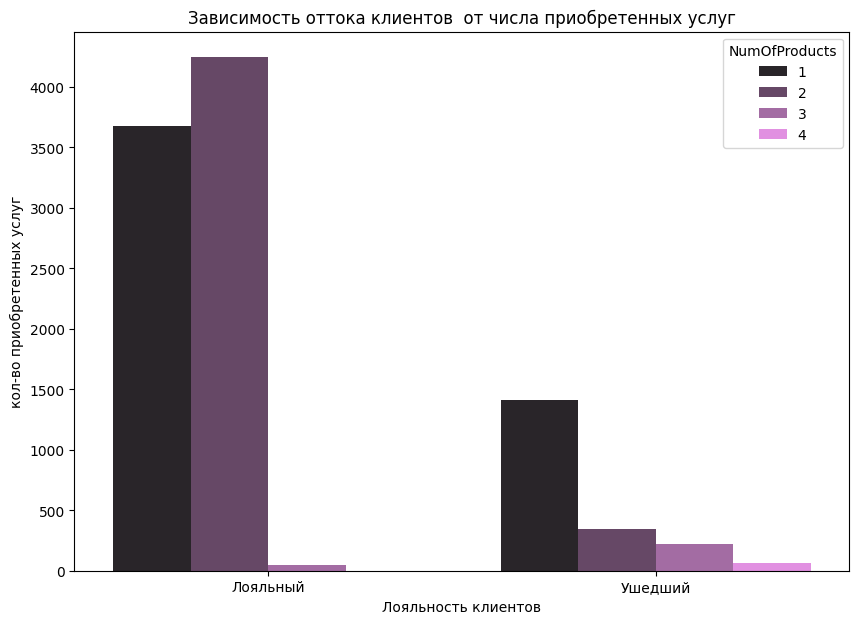

In [31]:
# Создаем многоуровневую столбчатую диаграмму
fig = plt.figure(figsize=(10, 7))
mask = churn_df.groupby('Exited', as_index=False)['NumOfProducts'].value_counts()
result = sns.barplot(
    data=mask,
    x = 'Exited',
    y = mask['count'],
    hue = 'NumOfProducts',
    color='violet'
)
result.set_title('Зависимость оттока клиентов  от числа приобретенных услуг')
result.set_xlabel('Лояльность клиентов')
result.set_xticklabels(['Лояльный', 'Ушедший'])
result.set_ylabel('кол-во приобретенных услуг');

На графике видно что клиенты с двумя услугами банка гораздо лояльнее чем с друим кол-вом услуг

C:\Users\huk80\AppData\Local\Temp\ipykernel_1096\2100870090.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\huk80\AppData\Local\Temp\ipykernel_1096\2100870090.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



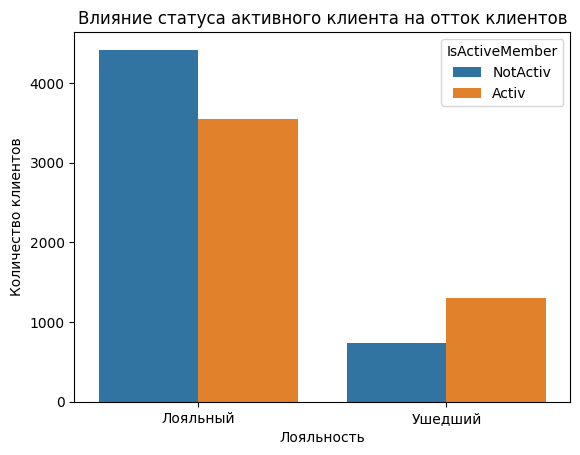

In [32]:
# Создаем многоуровневую столбчатую диаграмму
mask = churn_df.groupby('IsActiveMember', as_index=False)['Exited'].value_counts()
bar = sns.barplot(
    data=mask,
    x = 'Exited',
    y = mask['count'],
    hue = activ_klients
)
bar.set_title('Влияние статуса активного клиента на отток клиентов')
bar.set_xlabel('Лояльность')
bar.set_ylabel('Количество клиентов')
bar.set_xticklabels(['Лояльный', 'Ушедший']);

Я бы посоветовал банку создать промоакцию на активацию активного статуса клиента

In [33]:
# Считаем кол-во ушедших клиентов по странам
mask = churn_df.groupby('Geography', as_index=False)['Exited'].mean()

# Создаем тепловую картограмму
fig = px.choropleth(
    data_frame=mask,
    locations=mask['Geography'],
    locationmode = "country names",
    color='Exited',
    range_color=[0, 1], #диапазон цвета
    title='Доля ушедших клиентов по всему миру', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.show();

C:\Users\huk80\AppData\Local\Temp\ipykernel_1096\3228672228.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



тепловая картограмма котороя показывает что больше всего ушедших клинетов в Германии.

C:\Users\huk80\AppData\Local\Temp\ipykernel_1096\228551079.py:23: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



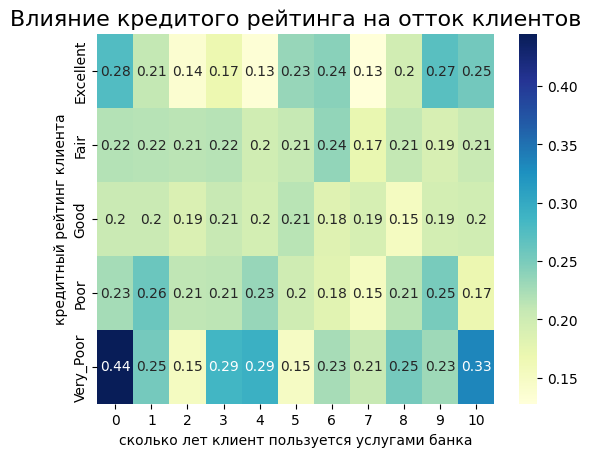

In [34]:
# функция определяющая категорию кредитного рейтинга
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
# создаем новый столбец с категориями кредитного рейтинга
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)
churn_df['CreditScoreCat'] = churn_df['CreditScoreCat'].astype('category')

# таблица определяющая долю ушедших клиентов по кредитному рейтингу и сроку пользования бакном
mask = churn_df.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean'
)

# Создаем тепловую карту
heatmap = sns.heatmap(data=mask, cmap='YlGnBu', annot=True)
heatmap.set_title('Влияние кредитого рейтинга на отток клиентов', fontsize=16)
heatmap.set_xlabel('сколько лет клиент пользуется услугами банка')
heatmap.set_ylabel('кредитный рейтинг клиента');

По графику видно что чаще всего уходят клиенты имеющие низкий рейтинг кредита и имеющие стаж менее года.